### K-medias

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8,4)
plt.style.use('ggplot')

In [2]:
data = np.array([[8,10],[3,10.5],[7,13.5],[5,18],[5,13],[6,9],[9,11],[3,18],[8.5,12],[8,16]])
C = np.array([[8,10],[3,10.5]])

In [3]:
np.sqrt((C[0,0] - C[1,0])**2 + (C[0,1] - C[1,1])**2)

np.float64(5.024937810560445)

In [4]:
np.linalg.norm(C[0] - C[1])

np.float64(5.024937810560445)

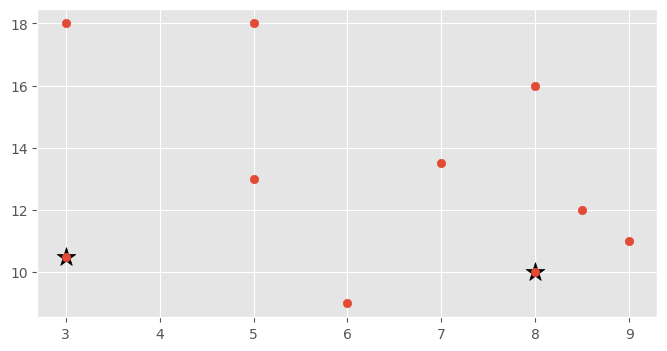

In [5]:
# Gráfica
plt.scatter(C[:,0], C[:,1], marker = '*', s = 200, c = 'k')
plt.scatter(data[:,0], data[:,1])

In [6]:
distances = []
clusters = []

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Grupos
for i in range(len(data)):
    distance = dist(data[i], C) # Distancia del punto actual a las k-medias
    distances.append(distance)
    cluster = np.argmin(distance) # Grupo al que pertenece
    clusters.append(cluster)

print(clusters, '\n', np.array(distances))

[np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0)] 
 [[0.         5.02493781]
 [5.02493781 0.        ]
 [3.64005494 5.        ]
 [8.54400375 7.76208735]
 [4.24264069 3.20156212]
 [2.23606798 3.35410197]
 [1.41421356 6.02079729]
 [9.43398113 7.5       ]
 [2.06155281 5.70087713]
 [6.         7.43303437]]


In [7]:
# Recalcular centroides
for i in range(len(C)):
    points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
    # print(points )
    C[i] = np.mean(points, axis=0)

C

array([[ 7.75      , 11.91666667],
       [ 4.        , 14.875     ]])

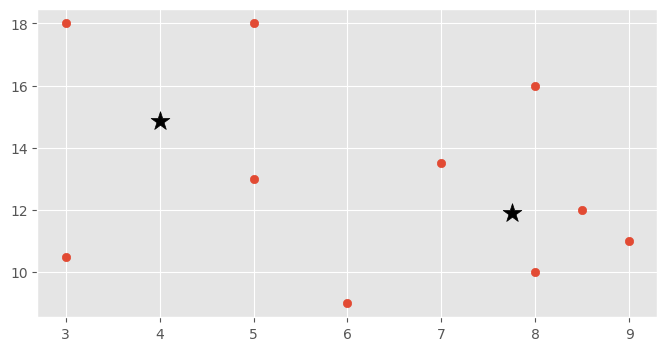

In [8]:
# Gráfica
plt.scatter(C[:,0], C[:,1], marker = '*', s = 200, c = 'k')
plt.scatter(data[:,0], data[:,1])

### Sklearn

### Exploratory data analysis

In [9]:
import pandas as pd

In [10]:
plt.rcParams['figure.figsize'] = (14,8)
plt.style.use('ggplot')

In [11]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/refs/heads/master/csv/cluster/xclara.csv'
data = pd.read_csv(url)
print(data.shape)
data.head()

(3000, 3)


,rownames,V1,V2
0,1,2.072345,-3.241693
1,2,17.936710,15.784810
2,3,1.083576,7.319176
3,4,11.120670,14.406780
4,5,23.711550,2.557729


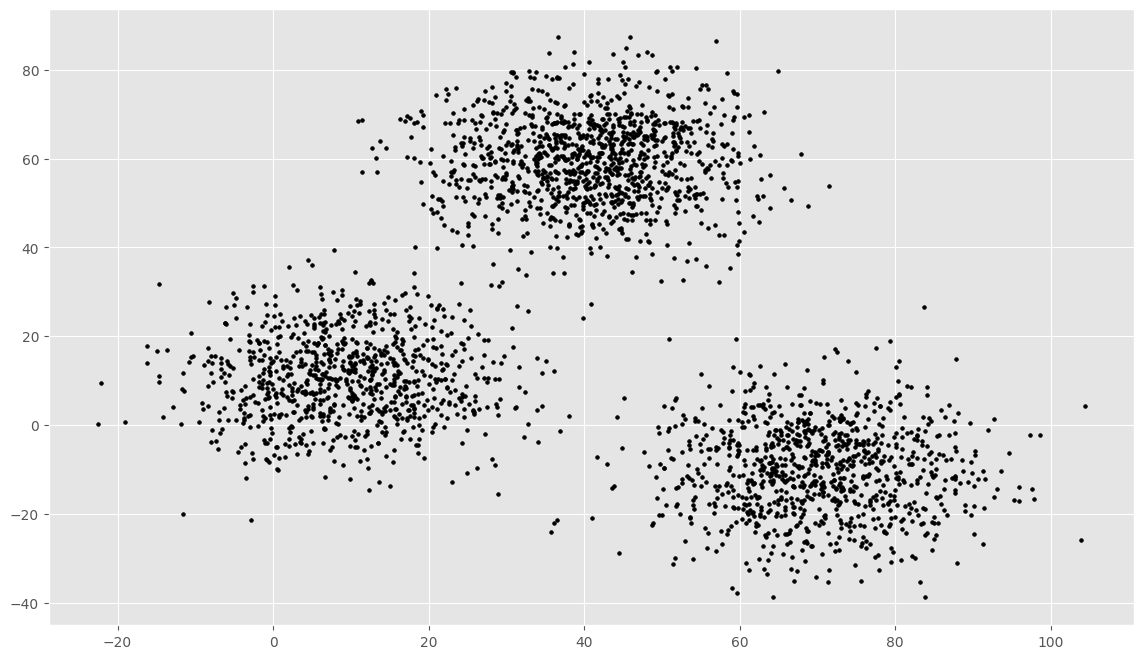

In [12]:
v1, v2 = data['V1'].values, data.V2.values
plt.scatter(v1, v2, c='k', s=7)
plt.show()

In [13]:
from sklearn.cluster import KMeans
X = np.array(list(zip(v1, v2)))
km = KMeans(n_clusters=3, n_init='auto')
km.fit(X)
y_hat = km.predict(X)
C = km.cluster_centers_

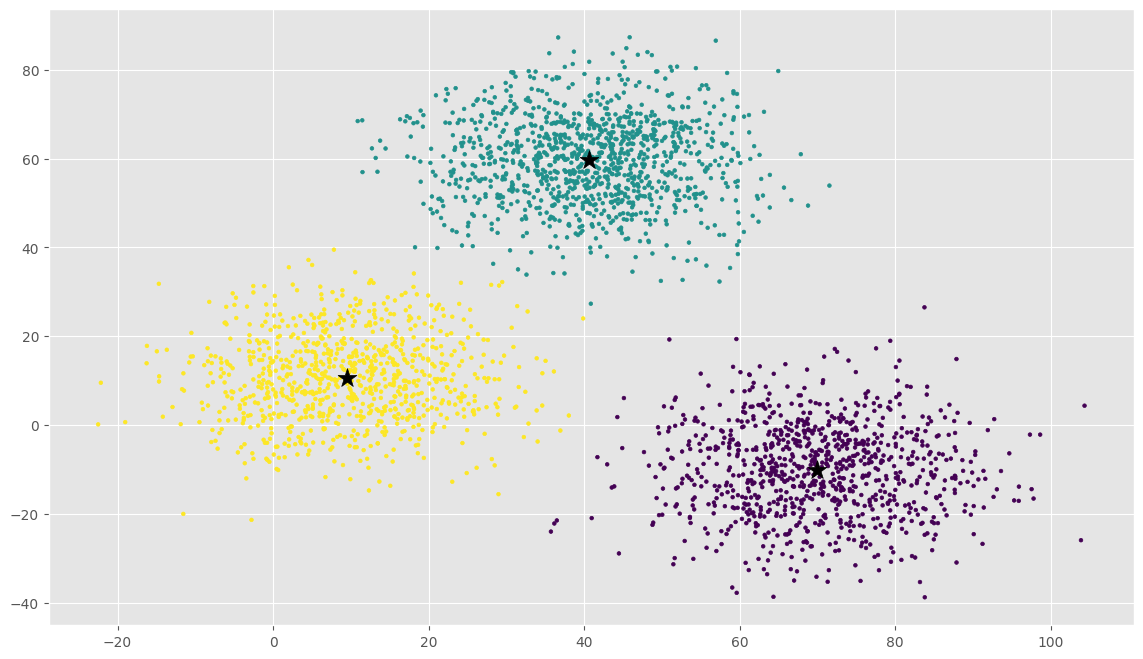

In [14]:
plt.scatter(X[:,0], X[:,1], c=y_hat, s=7)
plt.scatter(C[:,0], C[:,1], marker='*', s=200, c='k')
plt.show()

#### Determinar número de clusters con gráfica del codo (alternativa a la gráfica de dispersión)


In [15]:
import seaborn as sns
sns.set_theme()

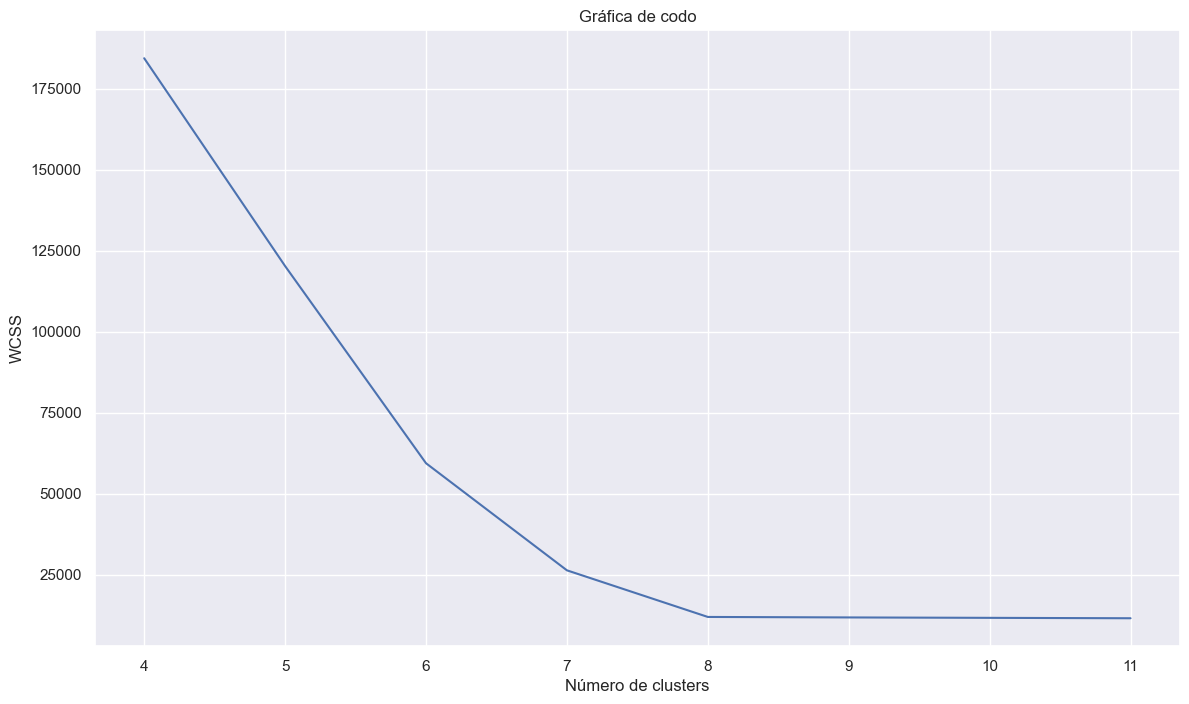

In [16]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=1000, n_features = 12, centers=8, random_state=42)
# Buscar número 'optimo' de clusters
wcss = [] # within cluster sum of squares
for i in range(4, 12):
    km = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
# Gráfica
plt.plot(range(4,12), wcss)
plt.title('Gráfica de codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

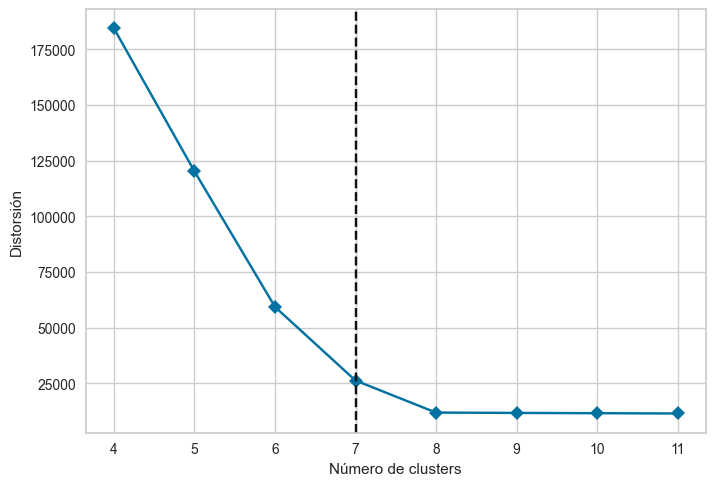

In [17]:
### Bootcamp
from yellowbrick.cluster import KElbowVisualizer
X, _ = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)
# Gráfica
vis = KElbowVisualizer(KMeans(n_init='auto', random_state=0), k=(4,12), timings=False)
vis.fit(X)
plt.xlabel('Número de clusters')
plt.ylabel('Distorsión')
plt.show()

In [18]:
# 3D
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

In [19]:
km = KMeans(n_clusters=4, n_init='auto')
km = km.fit(X)
y_hat = km.predict(X)
C = km.cluster_centers_
C

array([[-4.12367422, -7.63020483,  3.63497099],
       [ 7.09599695,  2.07722773, -6.73703689],
       [-5.47109649,  3.78764613,  7.33263178],
       [-8.39457688, -0.15781695,  8.337924  ]])

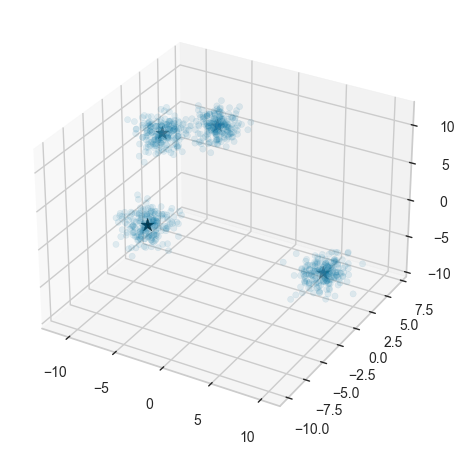

In [20]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], alpha=0.1)
ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', s=100, c='k')
plt.show()

### K-modas

In [21]:
# Datos
data = np.array([['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']])

# Modas iniciales
modes = np.array([['x', 'y', 'z'],
                  ['z', 'y', 'x']])
data.shape

(8, 3)

In [22]:
# Asignar clusters
clusters = np.zeros(data.shape[0])
distances = []
for i, object in enumerate(data):
    dist = [sum(object != mode) for mode in modes]
    distances.append(dist)
    clusters[i] = np.argmin(dist)
print(clusters)
distances

[0. 1. 1. 0. 0. 1. 0. 1.]


[[np.int64(0), np.int64(2)],
 [np.int64(3), np.int64(2)],
 [np.int64(3), np.int64(1)],
 [np.int64(2), np.int64(3)],
 [np.int64(2), np.int64(3)],
 [np.int64(2), np.int64(0)],
 [np.int64(2), np.int64(3)],
 [np.int64(2), np.int64(0)]]

In [23]:
# Actualizar modas
for i in range(len(modes)):
    points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])
    print(points)
    for h in range(modes.shape[1]):
        vals, counts = np.unique(points[:,h], return_counts=True)
        modes[i,h] = vals[np.argmax(counts)]
modes

[['x' 'y' 'z']
 ['y' 'z' 'z']
 ['x' 'z' 'y']
 ['x' 'x' 'y']]
[['y' 'z' 'x']
 ['z' 'x' 'x']
 ['z' 'y' 'x']
 ['z' 'y' 'x']]


array([['x', 'z', 'y'],
       ['z', 'y', 'x']], dtype='<U1')

In [24]:
from kmodes.kmodes import KModes

In [25]:
# Datos
data = np.array([['x', 'y', 'z'],
                 ['y', 'z', 'x'],
                 ['z', 'x', 'x'],
                 ['y', 'z', 'z'],
                 ['x', 'z', 'y'],
                 ['z', 'y', 'x'],
                 ['x', 'x', 'y'],
                 ['z', 'y', 'x']])

In [26]:
# Modelo con 2 grupos
km = KModes(n_clusters=2, init='random', n_init=5, verbose=True)
grupos = km.fit_predict(data)
grupos, km.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2, cost: 10.0
Run 5, iteration: 2/100, moves: 0, cost: 10.0
Best run was number 1


(array([0, 0, 1, 0, 0, 1, 0, 1], dtype=uint16),
 array([['x', 'z', 'y'],
        ['z', 'y', 'x']], dtype='<U1'))

In [27]:
# Otro ejemplo
col_cabello = np.array(['rubio', 'castaño', 'pelirrojo', 'negro', 'castaño', 'negro', 'pelirrojo', 'rubio'])
col_ojos = np.array(['azul', 'gris', 'verde', 'café', 'azul', 'gris', 'azul', 'café'])
tipo_cabello = np.array(['lacio', 'chino', 'ondulado', 'ondulado', 'chino', 'chino', 'ondulado', 'lacio'])
personas = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':personas, 'col_cabello':col_cabello, 'col_ojos':col_ojos, 'tipo_cabello':tipo_cabello})
data = data.set_index('person')
data

,col_cabello,col_ojos,tipo_cabello
person,,,
P1,rubio,azul,lacio
P2,castaño,gris,chino
P3,pelirrojo,verde,ondulado
P4,negro,café,ondulado
P5,castaño,azul,chino
P6,negro,gris,chino
P7,pelirrojo,azul,ondulado
P8,rubio,café,lacio


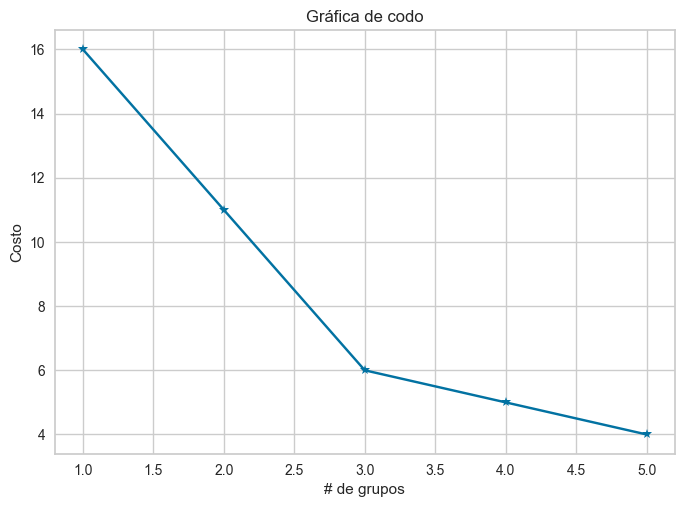

In [28]:
# Gráfica del codo
cost = []
k = range(1,6)
for nc in k:
    km = KModes(n_clusters=nc, init='random', n_init=5, verbose=False)
    km.fit_predict(data)
    cost.append(km.cost_)

plt.plot(k, cost, 'b*-')
plt.title('Gráfica de codo')
plt.xlabel('# de grupos')
plt.ylabel('Costo')
plt.show()

In [29]:
# 3 grupos
km = KModes(n_clusters=3, init='random', n_init=5, verbose=False)
grupos = km.fit_predict(data)
grupos, km.cluster_centroids_

(array([2, 1, 0, 0, 1, 1, 0, 2], dtype=uint16),
 array([['pelirrojo', 'azul', 'ondulado'],
        ['castaño', 'gris', 'chino'],
        ['rubio', 'azul', 'lacio']], dtype='<U9'))

In [30]:
data.insert(0, 'grupo', grupos)
data

,grupo,col_cabello,col_ojos,tipo_cabello
person,,,,
P1,2,rubio,azul,lacio
P2,1,castaño,gris,chino
P3,0,pelirrojo,verde,ondulado
P4,0,negro,café,ondulado
P5,1,castaño,azul,chino
P6,1,negro,gris,chino
P7,0,pelirrojo,azul,ondulado
P8,2,rubio,café,lacio
